#Decision Trees

#Classification Tasks

In [ ]:
#Mount the google drive connection to our dataset
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/AI/datasets/apple_quality.csv')

In [ ]:
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [ ]:
df.drop(df.tail(1).index, inplace=True)

In [ ]:
df.drop("A_id", axis=1, inplace=True)

In [ ]:
df["Acidity"] = df["Acidity"].astype(float)

In [ ]:
df.shape

(4000, 8)

In [ ]:
df.isnull().sum()

Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [ ]:
df.isna().sum()

Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

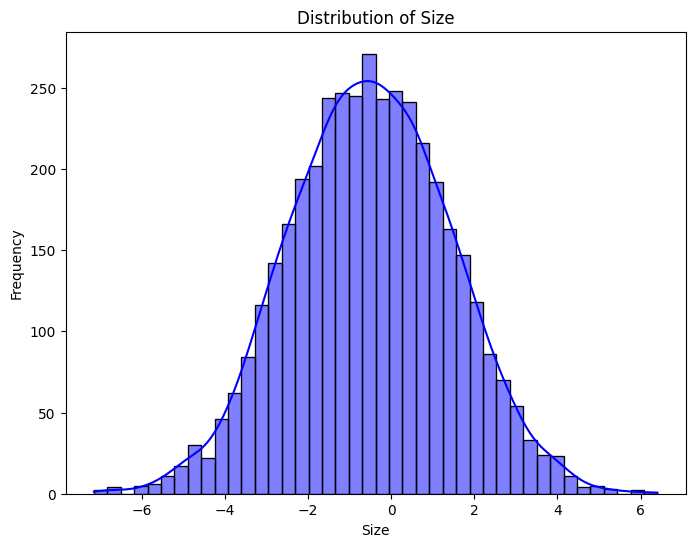

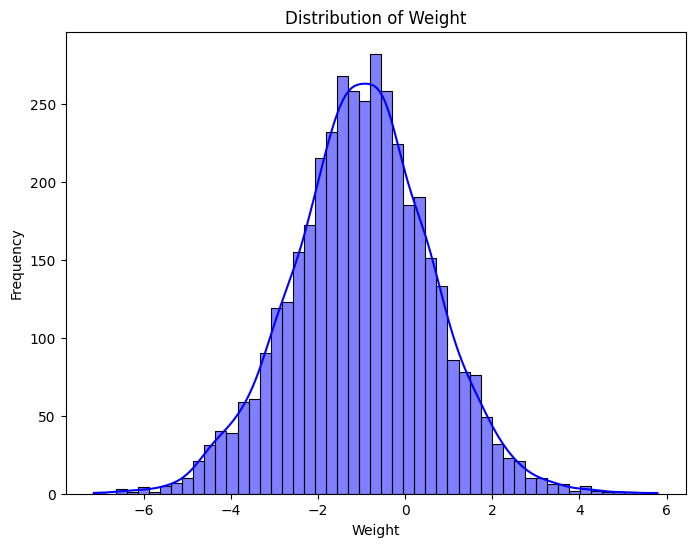

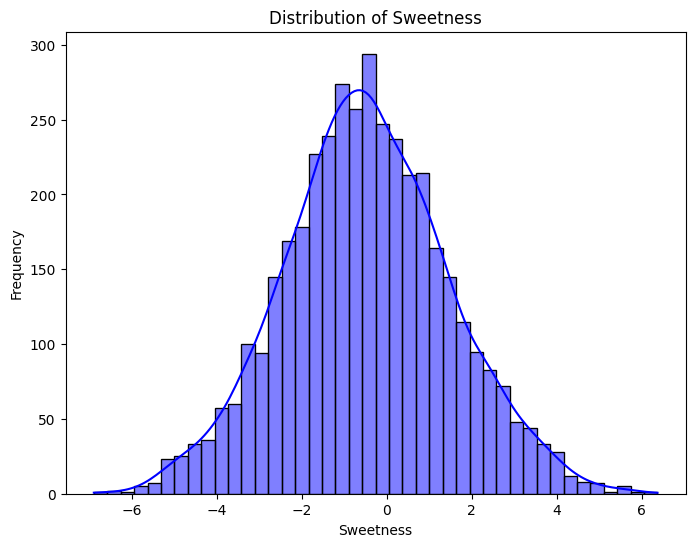

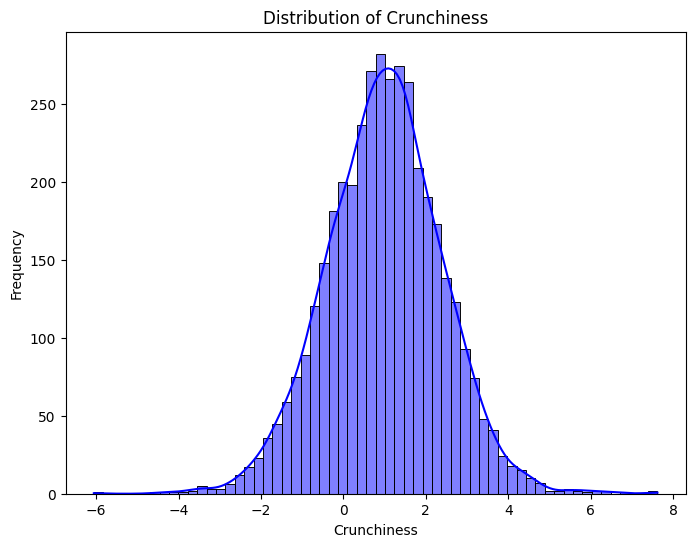

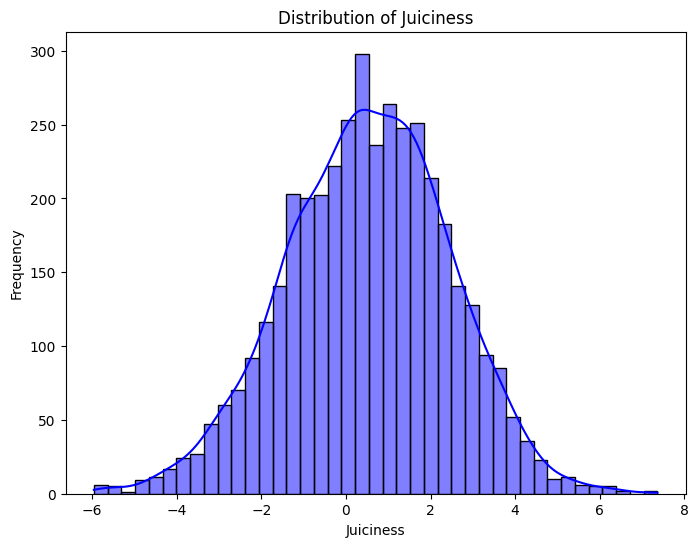

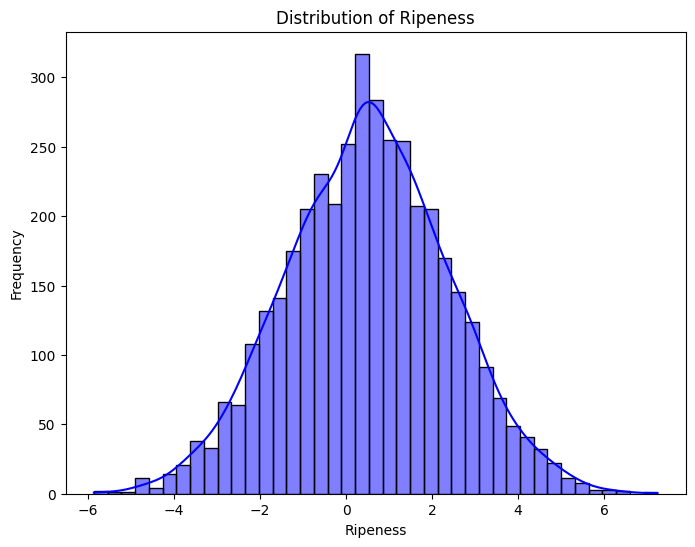

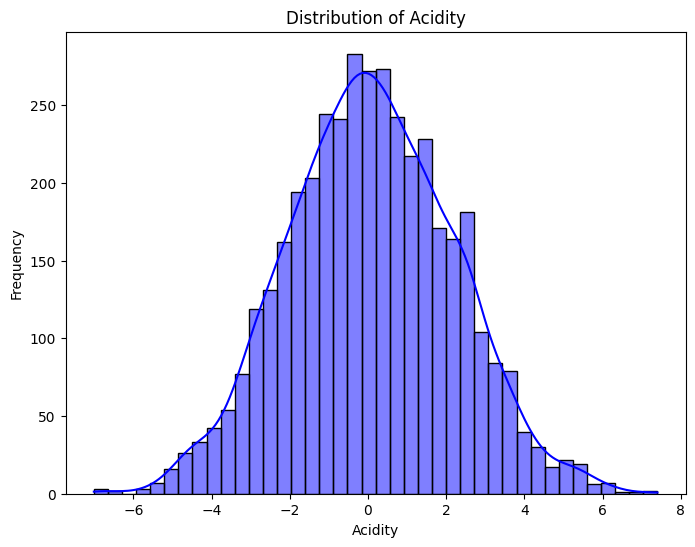

<ipython-input-12-eae17d6a7f85>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[feature], order=df[feature].value_counts().index, palette='Set2')


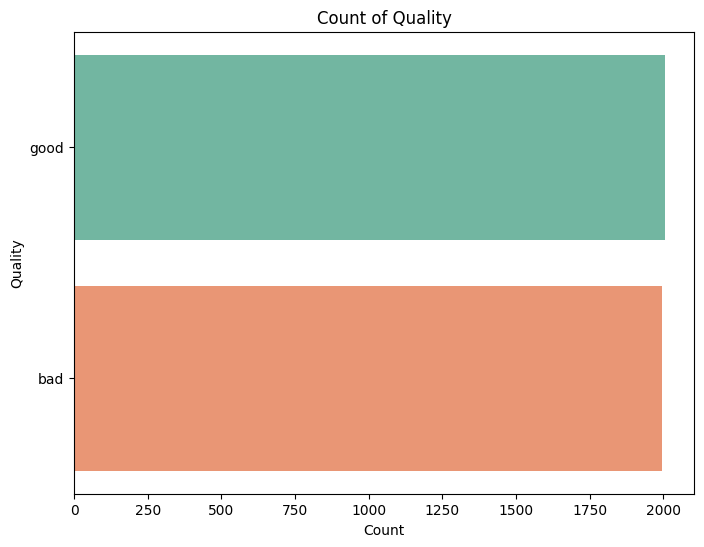

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_charts(df):
  # Numeric features
  numeric_features = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
  for feature in numeric_features:
      plt.figure(figsize=(8, 6))
      sns.histplot(df[feature], kde=True, color='blue')
      plt.title(f'Distribution of {feature}')
      plt.xlabel(feature)
      plt.ylabel('Frequency')
      plt.show()

  # Categorical features
  categorical_features = [col for col in df.columns if df[col].dtype == 'object']
  for feature in categorical_features:
      plt.figure(figsize=(8, 6))
      sns.countplot(y=df[feature], order=df[feature].value_counts().index, palette='Set2')
      plt.title(f'Count of {feature}')
      plt.xlabel('Count')
      plt.ylabel(feature)
      plt.show()

plot_charts(df)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

In [ ]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', StandardScaler())
])

In [ ]:
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

In [ ]:
X = df.drop(columns=['Quality'])
y = df['Quality']

In [ ]:
X_encoded = numeric_transformer.fit_transform(X)
X_encoded = pd.DataFrame(X_encoded, columns=X.columns)

In [ ]:
X_encoded

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,-1.798424,-0.950373,2.993421,-1.424150,0.690545,-0.089872,-0.269415
1,-0.359060,-1.154404,2.127698,0.429746,0.176767,0.197020,-0.378997
2,0.109445,-0.225759,-0.652507,-0.946892,1.205422,-0.286156,1.206044
3,-0.079977,-0.800146,0.923916,-0.772399,1.619575,-2.087320,0.338315
4,0.968573,-0.191640,0.044164,-1.096894,1.305025,-0.961548,0.201472
...,...,...,...,...,...,...,...
3995,0.291729,-0.048594,-1.669449,-0.365345,0.614425,0.931482,0.028866
3996,0.108878,1.834105,0.137124,-1.159058,-0.252634,-0.846326,0.842347
3997,-1.105655,-0.716904,-1.013784,-0.234036,0.874379,2.275957,-0.668950
3998,-1.818112,-0.492908,1.459901,-0.845446,0.854549,-0.151419,-1.093171


In [ ]:
y_encoded = cat_transformer.fit_transform(y.values.reshape(-1, 1))
y_encoded_df = pd.DataFrame(y_encoded.toarray(), columns=cat_transformer.named_steps['encoder'].get_feature_names_out())
y_encoded_df.drop("x0_bad", axis=1, inplace=True)
print(y_encoded_df.head())

   x0_good
0      1.0
1      1.0
2      0.0
3      1.0
4      1.0


In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X_encoded, y_encoded_df, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['auto', 'sqrt', 'log2', None],
}


grid_search = GridSearchCV(dtc, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

In [ ]:
best_model = grid_search.best_estimator_
print("Best parameters found:", grid_search.best_params_)

accuracy = best_model.score(X_val, y_val)
print("Accuracy of the best model in validation dataset:", accuracy)

accuracy = best_model.score(X_test, y_test)
print("Accuracy of the best model in test dataset:", accuracy)

Best parameters found: {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 8, 'min_samples_split': 2}
Accuracy of the best model in validation dataset: 0.78875
Accuracy of the best model in test dataset: 0.79


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

from yellowbrick.classifier import ROCAUC,ConfusionMatrix
from sklearn.metrics import accuracy_score

def Performance(model):
    global X_train,y_train,X_val,y_val,X_test,X_train

    print("REPORT:")
    print(classification_report(y_val,model.predict(X_val)))
    print(classification_report(y_test,model.predict(X_test)))

    visualizer = ROCAUC(model)
    visualizer.fit(X_train, y_train)
    visualizer.score(X_val, y_val)
    visualizer.score(X_test, y_test)
    visualizer.show();

    plt.figure(figsize=(3,3))
    cm = ConfusionMatrix(model)
    cm.fit(X_train, y_train)
    cm.score(X_val, y_val)
    cm.score(X_test, y_test)
    plt.xticks(rotation=0)
    cm.show();

In [ ]:
from sklearn.model_selection import cross_val_score
def CrossValidationScore(model_list):
    global X_train,y_train

    mean_cross_val_score = []
    model_name           = []

    for model in model_list:
        model_name.append(type(model).__name__)

    for i in model_list:
        scores = cross_val_score(i, X_train, y_train, cv=5)
        mean_cross_val_score.append(scores.mean())

    cvs = pd.DataFrame({"Model Name":model_name,"CVS":mean_cross_val_score})
    return cvs.style.background_gradient("Greens")

REPORT:
              precision    recall  f1-score   support

         0.0       0.78      0.80      0.79       393
         1.0       0.80      0.78      0.79       407

    accuracy                           0.79       800
   macro avg       0.79      0.79      0.79       800
weighted avg       0.79      0.79      0.79       800

              precision    recall  f1-score   support

         0.0       0.78      0.80      0.79       397
         1.0       0.80      0.78      0.79       403

    accuracy                           0.79       800
   macro avg       0.79      0.79      0.79       800
weighted avg       0.79      0.79      0.79       800



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


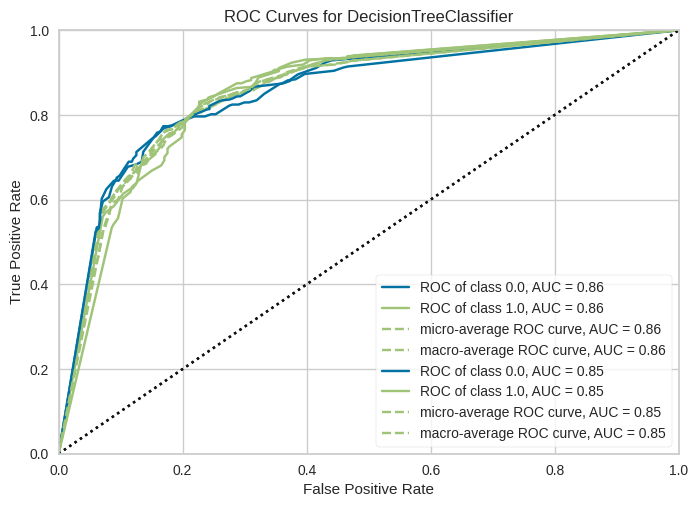

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


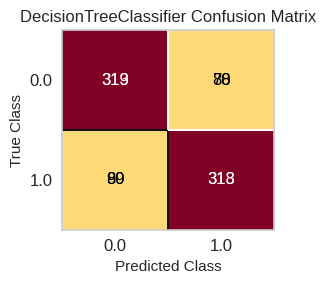

In [ ]:
Performance(best_model)

In [ ]:
CrossValidationScore([best_model])

,Model Name,CVS
0,DecisionTreeClassifier,0.810417


#Regression Tasks

In [ ]:
import pandas as pd
df_regression = pd.read_csv('/content/drive/My Drive/AI/datasets/housing.csv')

In [ ]:
df_regression.head()

,Unnamed: 0,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
df_regression.drop("Unnamed: 0",axis=1,inplace=True)

In [ ]:
df_regression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
df_regression.shape

(20640, 9)

In [ ]:
df_regression.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


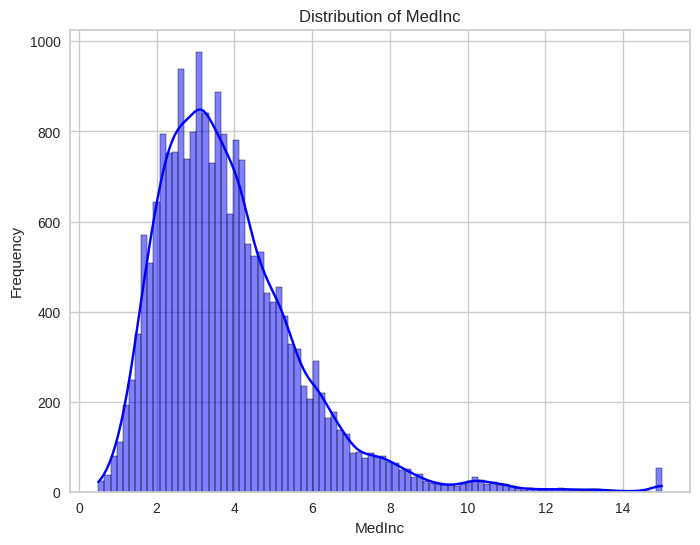

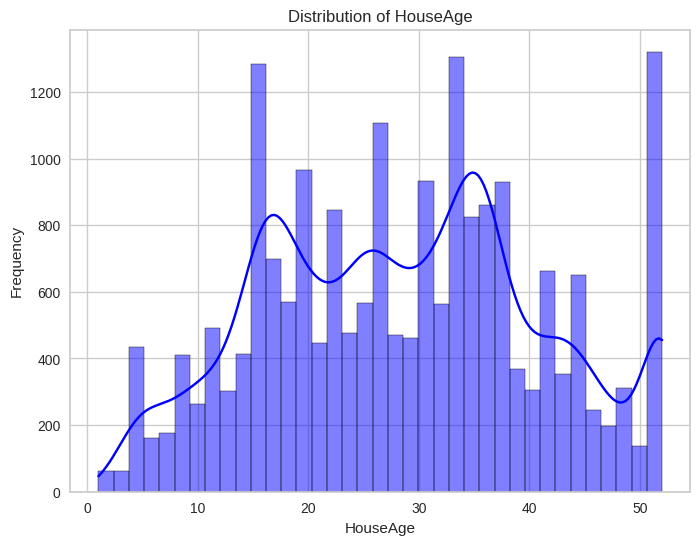

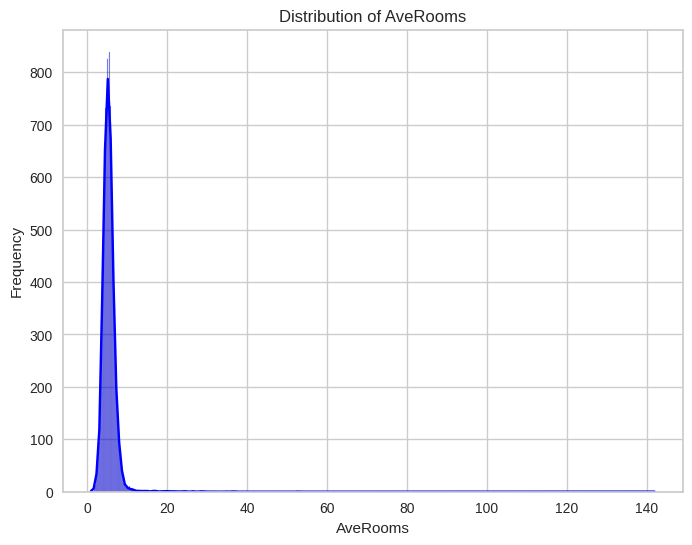

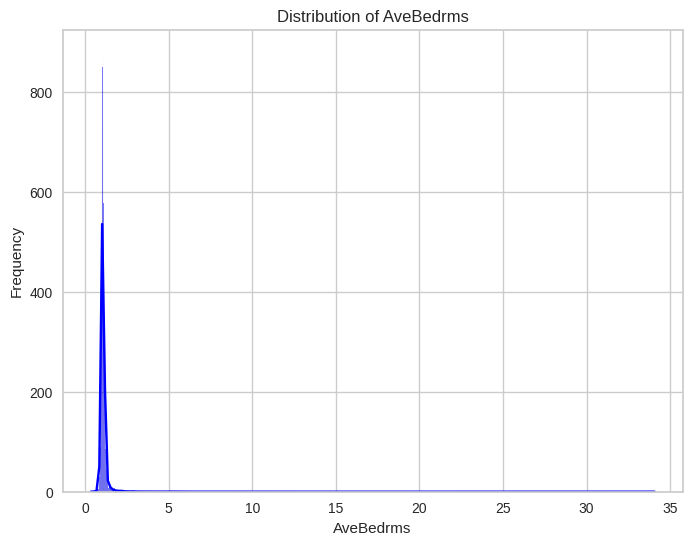

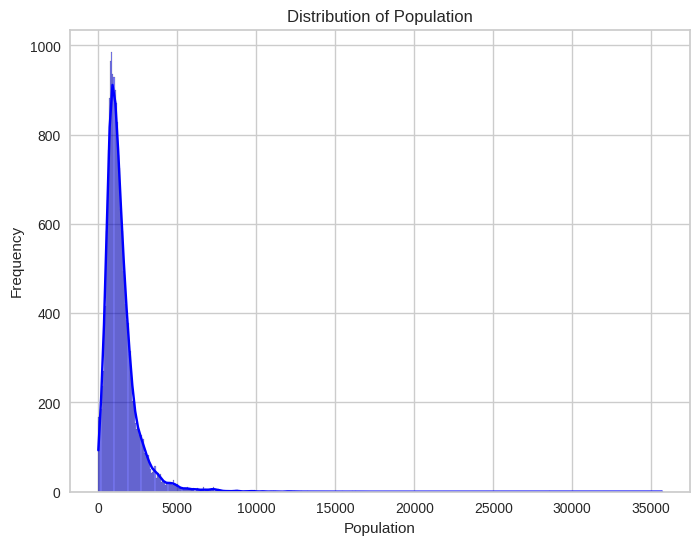

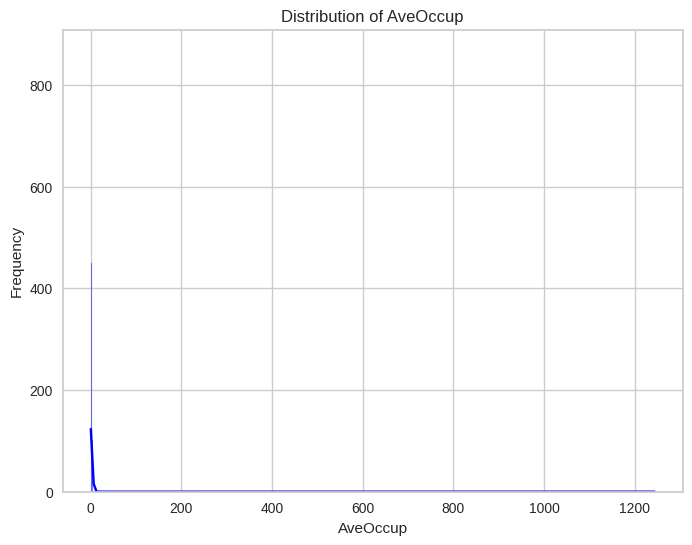

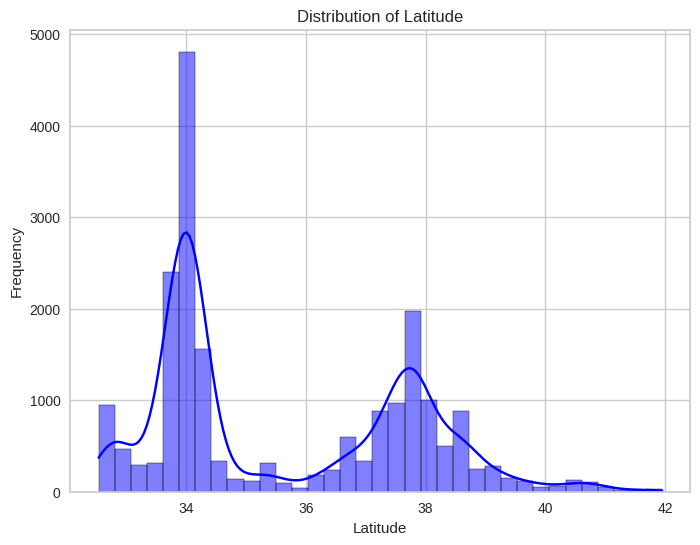

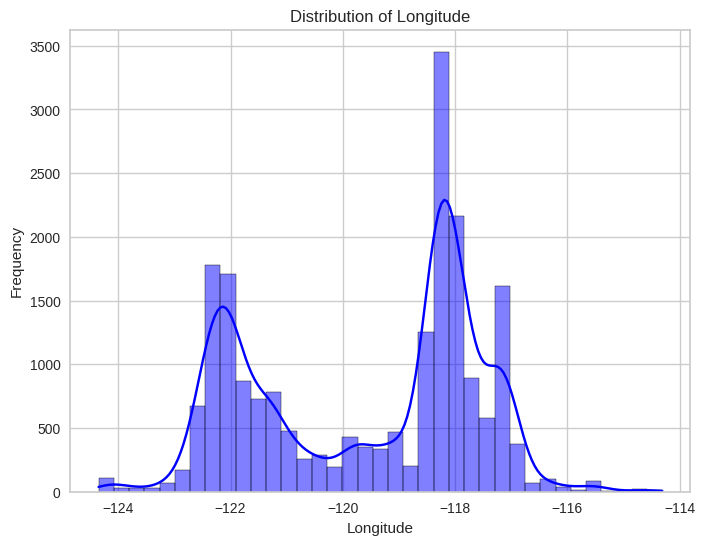

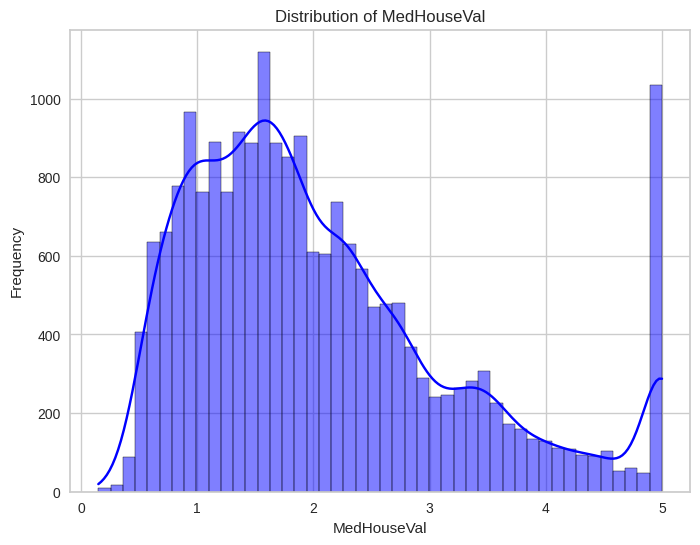

In [ ]:
plot_charts(df_regression)

In [ ]:
df_regression.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [ ]:
df_regression.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [ ]:
X = df_regression.drop("MedHouseVal", axis=1)
y = df_regression["MedHouseVal"]

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X_encoded, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
X_encoded = numeric_transformer.fit_transform(X)
X_encoded = pd.DataFrame(X_encoded, columns=X.columns)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(criterion='squared_error', max_depth=10, min_samples_split=4, min_samples_leaf=4, max_features=None)

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

dtr.fit(X_train, y_train)

y_val_pred = dtr.predict(X_val)

score = np.sqrt(mean_squared_error(y_val, y_val_pred))
print("RMSE of the model in validation dataset:", score)

y_test_pred = dtr.predict(X_test)

score = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("RMSE of the model in test dataset:", score)

RMSE of the model in validation dataset: 0.651933375764055
RMSE of the model in test dataset: 0.6467306064116207


In [ ]:
from sklearn.model_selection import cross_val_score
def CrossValidationScore(model_list):
    global X_train,y_train

    mean_cross_val_score = []
    model_name           = []

    for model in model_list:
        model_name.append(type(model).__name__)

    for i in model_list:
        scores = cross_val_score(i, X_train, y_train, cv=5)
        mean_cross_val_score.append(scores.mean())

    cvs = pd.DataFrame({"Model Name":model_name,"CVS":mean_cross_val_score})
    return cvs.style.background_gradient("Greens")

In [ ]:
CrossValidationScore([dtr])

,Model Name,CVS
0,DecisionTreeRegressor,0.685789
